In [28]:
import numpy as np 
import osmnx as osm
import networkx as nx
import matplotlib.pyplot as plt
import pickle

plt.rcParams['text.usetex'] = True


In [ ]:
def plot_degree_pdf(G, code, binsize=1):
    degrees = np.array([deg for _, deg in G.degree()])
    
    dmin, dmax = degrees.min(), degrees.max()
    bins = np.arange(dmin, dmax + binsize, binsize)

    counts, edges = np.histogram(degrees, bins=bins)
    pk = counts / counts.sum()
    
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    non_zero_indices = pk > 0

    fig = plt.figure(figsize=(5, 4))
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"{code}")
    plt.plot(bin_centers[non_zero_indices], pk[non_zero_indices], '-o',fillstyle='none',
             markersize=10,
             linewidth=1, color='black')
    plt.xlabel("$k$")
    plt.ylabel("$P(k)$")
    # ...

In [46]:
def plot_degree_pdf(G, code, binsize=1):
    degrees = np.array([deg for _, deg in G.degree()])
    
    dmin, dmax = degrees.min(), degrees.max()
    bins = np.arange(dmin, dmax + binsize, binsize)

    counts, edges = np.histogram(degrees, bins=bins)
    pk = counts / counts.sum()
    
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    non_zero_indices = pk > 0

    fig, ax = plt.subplots(figsize=(5, 4))

    ax.set_title(f"{code}")
    ax.plot(
        bin_centers[non_zero_indices],
        pk[non_zero_indices],
        '-o',
        fillstyle='none',
        markersize=10,
        linewidth=1,
        color='black'
    )
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel(r"$k$")
    ax.set_ylabel(r"$P(k)$")

    return fig, ax


In [55]:

city_name = "Bengaluru"
city_code = "BLR"

G = osm.graph_from_place(f"{city_name}, India", network_type="drive")

with open(f"{city_code}.gpickle", "wb") as f:
    pickle.dump(G, f)

In [56]:
len(nx.nodes(G))

154496

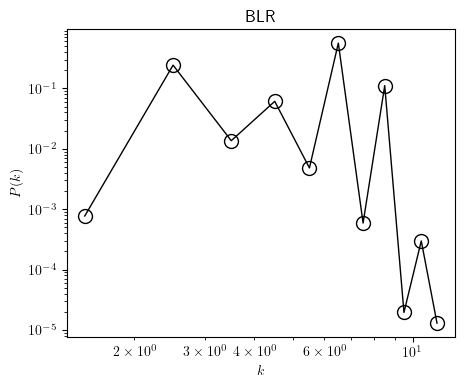

In [57]:

fig, ax = plot_degree_pdf(G, city_code, binsize=1)
fig.savefig(f"{city_code}.png", dpi=450)